In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import mnist

In [3]:
#Load dataset for the model
(X_train, y_train), (X_test, y_test) = mnist.load_data()

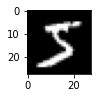

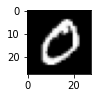

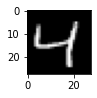

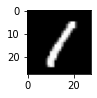

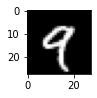

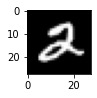

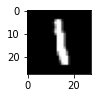

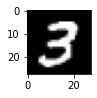

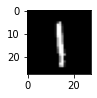

In [4]:
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.show()

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical

In [6]:
#Create categorical labels for the model

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [7]:
#Reshape imagesfrom 2d array to 1d array

X_train = np.reshape(X_train,(len(X_train), 28*28))
X_test = np.reshape(X_test,(len(X_test), 28*28))

In [8]:
X_train = np.asarray(list(map(lambda img: img / 255 ,X_train)))
X_test = np.asarray(list(map(lambda img: img / 255 ,X_test)))

In [9]:
model = Sequential()

model.add(Dense(units=784,activation='relu'))
model.add(Dense(units=784,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [11]:
model.fit(x=X_train,
         y=y_train_cat,
         epochs=20,
         validation_data=(X_test, y_test_cat),
         verbose=1,
         callbacks=[early_stop])

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1792 - val_loss: 0.1054
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0817 - val_loss: 0.0802
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0559 - val_loss: 0.0960
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0439 - val_loss: 0.0819
Epoch 00004: early stopping


<AxesSubplot:>

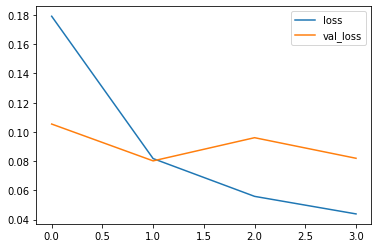

In [12]:
#Plot training process

model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [13]:
predict_x=model.predict(X_test) 
predictions=np.argmax(predict_x,axis=1)

In [15]:
#Evaluating the model

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.96      0.99      0.98      1032
           3       0.98      0.97      0.98      1010
           4       0.97      0.98      0.97       982
           5       0.99      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

[[ 967    1    2    0    0    0    5    1    2    2]
 [   0 1132    2    0    0    0    0    0    1    0]
 [   2    1 1020    1    1    0    0    3    4    0]
 [   0    0   13  982    0    4    0    3    3    5]
 [   2    2    3    1  960   

In [22]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, "./")